# Análisis de Ventas de Chocolates
## 1. Introducción
Este proyecto realiza un análisis exploratorio de datos (EDA) sobre un conjunto de ventas de chocolates, con el objetivo de:

- Comprender patrones de venta por país y producto.

- Analizar la distribución de las ventas y cantidades enviadas.

- Visualizar resultados mediante gráficos estadísticos y comparativos.

El dataset contiene información de ventas de chocolates en varios países durante el año 2022.

## 2. Importación de Librerías

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="rocket")

## 3. Carga y Exploración Inicial del Dataset

In [9]:
df = pd.read_csv('chocolate_sales.csv')

df.head(20)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184
5,Van Tuxwell,India,Smooth Sliky Salty,06/06/2022,"$5,376.00",38
6,Oby Sorrel,UK,99% Dark & Pure,25/01/2022,"$13,685.00",176
7,Gunar Cockshoot,Australia,After Nines,24/03/2022,"$3,080.00",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20/04/2022,"$3,990.00",59
9,Brien Boise,Australia,99% Dark & Pure,04/07/2022,"$2,835.00",102


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [11]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [12]:
df.describe()

,Boxes Shipped
count,3282.000000
mean,164.666971
std,124.024736
min,1.000000
25%,71.000000
50%,137.000000
75%,232.000000
max,778.000000


## 4. Limpieza de Datos

In [25]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

print(df.dtypes)

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object


In [27]:
df['Amount'] = (
    df['Amount']
    .astype(str)                     
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
)

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  

print(df.dtypes)

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object


In [29]:
df.describe()

,Date,Amount,Boxes Shipped
count,3282,3282.000000,3282.000000
mean,2023-05-03 15:09:06.252284928,6030.338775,164.666971
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-07-04 00:00:00,2521.495000,71.000000
50%,2023-05-11 00:00:00,5225.500000,137.000000
75%,2024-03-02 00:00:00,8556.842500,232.000000
max,2024-08-31 00:00:00,26170.950000,778.000000
std,NaN,4393.980200,124.024736


## 5. Análisis Exploratorio
## 5.1 Estadísticas Básicas

In [30]:
precio_promedio = np.mean(df['Amount'])
cajas_mediana = np.median(df['Boxes Shipped'])

print(f"Precio promedio: ${precio_promedio:,.2f}")
print(f"Mediana de cajas enviadas: {cajas_mediana}")

Precio promedio: $6,030.34
Mediana de cajas enviadas: 137.0


## 5.2 Ventas por País y Producto

In [34]:
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

country_sales.map('{:,.2f}'.format)

Country
Australia      3,646,444.35
UK             3,365,388.90
India          3,343,730.83
USA            3,313,858.09
Canada         3,078,495.65
New Zealand    3,043,654.04
Name: Amount, dtype: object

In [35]:
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

top_products.map('£{:,.2f}'.format)

Product
Smooth Sliky Salty      £1,120,201.09
50% Dark Bites          £1,087,659.35
White Choc              £1,054,257.00
Peanut Butter Cubes     £1,036,591.09
Eclairs                   £996,947.96
99% Dark & Pure           £960,033.45
85% Dark Bars             £955,268.24
Organic Choco Syrup       £945,345.73
Spicy Special Slims       £938,131.69
Mint Chip Choco           £904,989.55
Almond Choco              £890,454.65
Manuka Honey Choco        £885,208.03
Milk Bars                 £866,273.62
Raspberry Choco           £845,388.41
After Nines               £837,215.67
Fruit & Nut Bars          £829,278.96
Orange Choco              £824,070.85
Drinking Coco             £822,245.57
Baker's Choco Chips       £799,085.67
Choco Coated Almonds      £773,062.91
Caramel Stuffed Bars      £742,516.15
70% Dark Bites            £677,346.22
Name: Amount, dtype: object

## 6. Visualización
## 6.1 Distribución de Ventas y Ventas por País

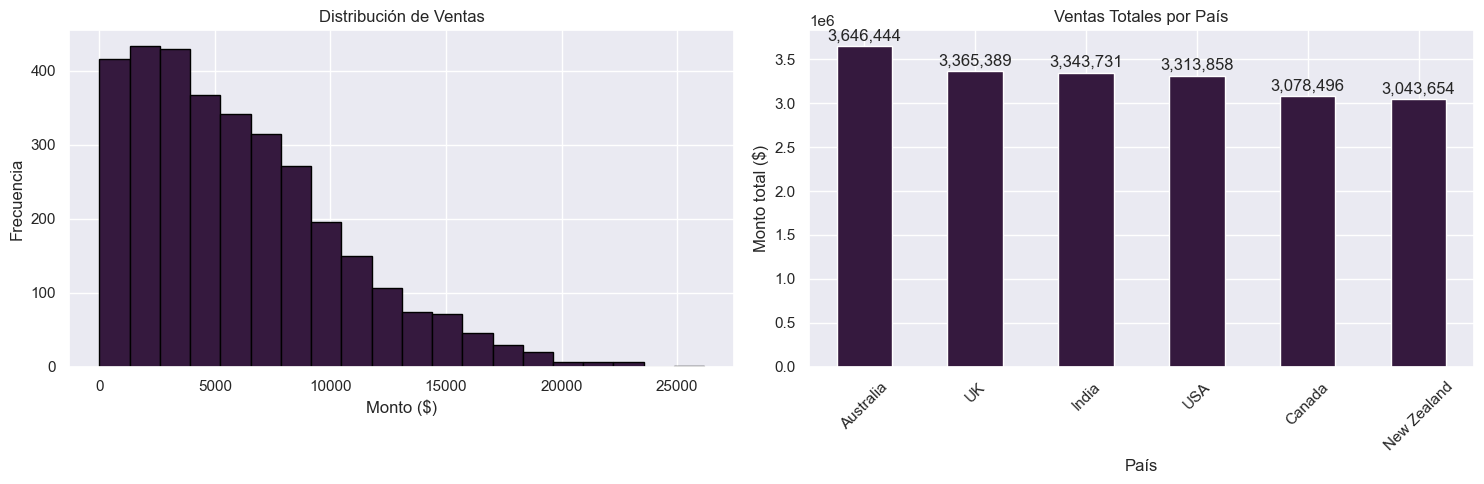

In [36]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=20, edgecolor='black')
plt.title('Distribución de Ventas')
plt.xlabel('Monto ($)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
bars = country_sales.plot(kind='bar', ax=plt.gca())
plt.title('Ventas Totales por País')
plt.xlabel('País')
plt.ylabel('Monto total ($)')
plt.xticks(rotation=45)

for i, v in enumerate(country_sales):
    plt.text(i, v + v*0.01, '{:,.0f}'.format(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 6.2 Boxplots y Barras con Seaborn

C:\Users\patri\AppData\Local\Temp\ipykernel_8328\508716444.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.barplot(x=amount_sum.values, y=amount_sum.index, ax=axs[1], palette="rocket")


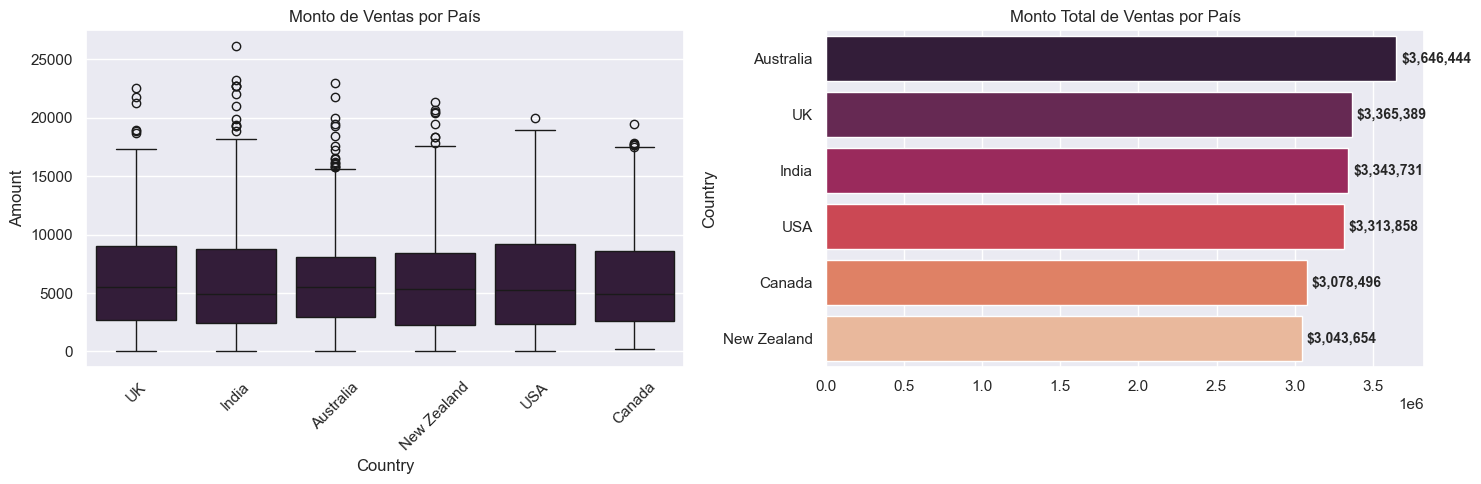

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x='Country', y='Amount', ax=axs[0])
axs[0].set_title('Monto de Ventas por País')
axs[0].tick_params(axis='x', rotation=45)

amount_sum = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
countplot = sns.barplot(x=amount_sum.values, y=amount_sum.index, ax=axs[1], palette="rocket")
axs[1].set_title('Monto Total de Ventas por País')

for p in countplot.patches:
    width = p.get_width()
    axs[1].text(width + width*0.01, p.get_y() + p.get_height()/2., f'${width:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 6.3 Ventas vs Cajas Enviadas

C:\Users\patri\AppData\Local\Temp\ipykernel_8328\1775236004.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.barplot(x=boxes_sum.values, y=boxes_sum.index, ax=axs[1], palette="rocket")


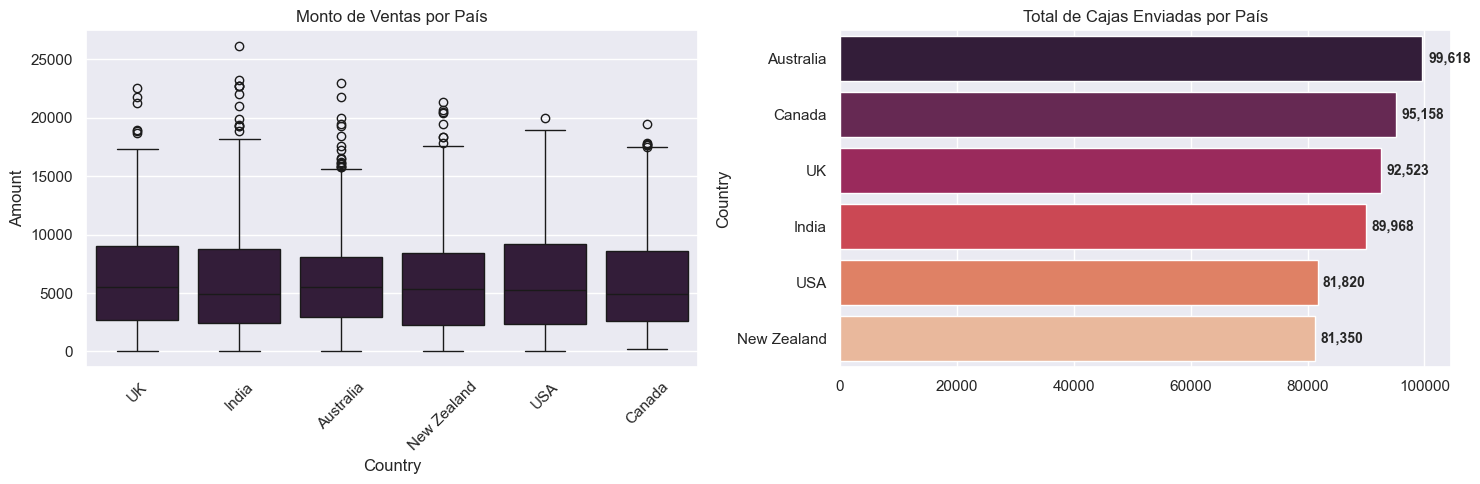

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x='Country', y='Amount', ax=axs[0])
axs[0].set_title('Monto de Ventas por País')
axs[0].tick_params(axis='x', rotation=45)

boxes_sum = df.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending=False)
countplot = sns.barplot(x=boxes_sum.values, y=boxes_sum.index, ax=axs[1], palette="rocket")
axs[1].set_title('Total de Cajas Enviadas por País')

for p in countplot.patches:
    width = p.get_width()
    axs[1].text(width + width*0.01, p.get_y() + p.get_height()/2., f'{int(width):,}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## **7. Conclusiones**

1. **Patrones de ventas por país y productos destacados**  
   Australia y el Reino Unido se posicionan como los mercados más fuertes tanto en ventas totales como en volumen de cajas enviadas, seguidos muy de cerca por India y Estados Unidos. En cuanto al portafolio de productos, **Smooth Sliky Salty** y **50% Dark Bites** destacan como los más rentables, lo que sugiere una preferencia clara del mercado por estos sabores y una oportunidad para reforzar su estrategia comercial.

2. **Distribución de montos de venta y variabilidad**  
   La mayoría de las transacciones se concentran entre **$2,500 y $8,500**, lo que indica un rango típico de compra relativamente estable. Sin embargo, existen ventas de montos muy altos que generan asimetría positiva en la distribución y afectan la forma de los boxplots. Esto confirma que el negocio maneja tanto pedidos estándar como pedidos significativamente grandes, probablemente asociados a clientes mayoristas o compras estacionales.

3. **Relación entre ventas y cajas enviadas**  
   Se observa una **correlación moderada** entre el monto vendido y el número de cajas enviadas por país. Esto implica que, aunque los países con mayores ventas tienden también a enviar más cajas, el valor económico de los pedidos no siempre crece en la misma proporción que el volumen físico. Este comportamiento sugiere diferencias en precios por producto, tamaños de pedido o estrategias comerciales específicas por región.